### Context
Airbnb is an online platform that allows people to rent short-term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one hand, Airbnb enables owners to list their space and earn rental money. On the other hand, it provides travelers easy access to renting private homes. Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction. As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

### Objective
To explore and visualize the data, to discover the factors that affect the prices of Airbnb rental
rooms, and generate a set of insights and recommendations that will help the business.

### Data Description: 
AirBNB.csv

The data contains information about the different types of rental rooms offered by Airbnb over a
fixed period of time. The detailed data dictionary is given below.

### Data Dictionary
- id: Property ID
- room_type: Type of Room in the property
- accommodates: How many adults can this property accommodate
- bathrooms: Number of bathrooms on the property
- cancellation_policy: Cancellation policy of the property
- cleaning_fee: This denotes whether the property cleaning fee is included in the rent or not
- instant_bookable: It indicates whether an instant booking facility is available or not
- review_scores_rating: Review rating score of the property
- bedrooms: Number of bedrooms in the property
- beds: Total number of beds in the property
- log_price: Log of the rental price of the property for a fixed period. [If the price is 12000
dollars, then log_price represents log(12000)]

In [213]:
import pandas as pd

import numpy as np

import seaborn as sb

import matplotlib.pyplot as mpl

from utils import labeled_barplot, histogram_boxplot

The necessary libraries were imported.

In [286]:
path = r"C:\Users\User\Desktop\Alied Tech\Project\Raw Data\AirBNB (1).csv"

original_data = pd.read_csv(path)

data = original_data.copy()

C:\Users\User\AppData\Local\Temp\ipykernel_9288\2711902007.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  original_data = pd.read_csv(path)


- The data was loaded and a copy of it was made.

## Exploratory Data Analysis (EDA)

In [287]:
data.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


- The first five rows of the data were viewed.

In [288]:
data.shape

(74111, 11)

- The data has 74,111 rows and 11 columns

In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


- The datatype in each of the columns (fields or variables) corresponds to what is expected, except for the "instant_bookable" and "cleaning_fee" which were supposed to be Booleans but are showing objects.

In [290]:
data.duplicated().sum()

0

- There are no duplicates in the data

In [291]:
data.isnull().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

In [292]:
data.isna().sum()

id                          0
room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

- The "isna and isnull" gave same output, which means there are no empty strings, only missing values.
- The dataset has a lot of missing values from some of the columns. For example, "bathrooms, review_scores_rating, beds", among others.

## Data Cleaning and Preprocessing

### Observations and Mitigations

- The "review_scores_rating" is not the actual rating which is usually between 1.0 to 5.0 (bad, moderate, fair, good, excellent, etc), but this seem to be the total count of reviews that a particular property (room, home, apartment, etc) has received.

- So the NaN in the "review_scores_rating" would be dropped because either the property has not actually received any review rating (perhaps it is new) or the property owner deactivated the public review sections.

- The "id" (which is the unique identifier of a property) would be dropped because the objective of the project is not targeted to each individual property but to the entire property as a whole or collectively.

- The price which is the target was converted to "log_price" due to its uneven distribution (either left-skewed or right-skewed). The log_price values will post a high level of unclarity and imprecision to a layman or a non-statiscian (non-statistical expert), so it will be converted back to the actual price, since as a data analytic project it does not require building a machine learning model.

- The column instant_booking contains t and f, which obviously stands for true (yes) and false (no) respectively.

- Other columns which have missing values might either be filled with their mean or mode depending on their datatype (numerical or categorical).

In [293]:
data.drop("id", axis=1, inplace=True)

- The "id" variable or column has been dropped.

In [294]:
data.head(2)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899


- Confirming that the dropped id column has been effected.

In [295]:
data.dropna(subset="review_scores_rating", inplace= True)

- The missing values in the "review_scores_rating" have been dropped

In [296]:
data.reset_index(drop= True, inplace= True)

- The index for the respective rows that were dropped has been reset.

In [297]:
data.isna().sum()

room_type                 4
accommodates              1
bathrooms               160
cancellation_policy       5
cleaning_fee              4
instant_bookable          0
review_scores_rating      0
bedrooms                 71
beds                     62
log_price                 0
dtype: int64

- Confirming that the missing values in "review_scores_rating" have been successfully dropped.

In [298]:
# checking the rows in the different columns where there are missing values.

data[data.room_type.isna()]

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
126,NaN,5.0,1.0,strict,True,f,97.0,2.0,3.0,5.575949
150,NaN,2.0,1.0,moderate,True,f,99.0,1.0,1.0,3.555348
201,NaN,4.0,1.0,moderate,True,f,91.0,1.0,2.0,4.418841
424,NaN,1.0,2.5,strict,True,t,100.0,1.0,1.0,4.488636


In [299]:
data[data.accommodates.isna()]

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
357,Entire home/apt,NaN,NaN,NaN,True,f,82.0,1.0,3.0,4.867534


In [300]:
data[data.cleaning_fee.isna()]

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
160,Private room,2.0,1.0,NaN,NaN,t,96.0,1.0,1.0,4.584967
164,Entire home/apt,2.0,1.0,NaN,NaN,f,93.0,1.0,1.0,4.787492
182,Entire home/apt,2.0,1.0,NaN,NaN,f,100.0,1.0,1.0,5.298317
312,Entire home/apt,2.0,1.0,NaN,NaN,t,100.0,1.0,1.0,5.703782


- The Nan in "cleaning_fee" occurs where there is a sort of trend. For example, where accommodates is 2.0, bathrooms is 1.0, bedrooms is 1.0, beds is 1.0 and cancellation_policy is NaN

In [301]:
data["price"] = np.exp(data.log_price)

- The "log_price" has been converted back to to the actual or original price. 

In [302]:
data.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635,150.0
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899,169.0
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734,145.0
3,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932,115.0
4,Private room,2.0,1.0,strict,True,t,100.0,1.0,1.0,4.442651,85.0


- We can see the the new column named "price" and also the difference from the corresponding "log_price" values.

In [303]:
data.instant_bookable.replace(["t", "f"], value= [True, False], inplace=True)

- The "t and f" in instant_bookable have been replaced by "True and False" respectively.

In [304]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,57385,3,Entire home/apt,33015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,57388.0,NaN,NaN,NaN,3.218199,2.144142,1.0,2.0,2.0,4.0,16.0
bathrooms,57229.0,NaN,NaN,NaN,1.22652,0.562049,0.0,1.0,1.0,1.0,8.0
cancellation_policy,57384,3,strict,27917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,57385,2,True,45574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,57389,2,False,42009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.0,NaN,NaN,NaN,94.067365,7.836556,20.0,92.0,96.0,100.0,100.0
bedrooms,57318.0,NaN,NaN,NaN,1.261192,0.84172,0.0,1.0,1.0,1.0,10.0
beds,57327.0,NaN,NaN,NaN,1.738151,1.265496,0.0,1.0,1.0,2.0,18.0
log_price,57389.0,NaN,NaN,NaN,4.749232,0.6687,0.0,4.304065,4.70048,5.164786,7.600402


- The missing values in "accommodation, bathrooms, bedrooms and beds" which are all numerical variables, will be repleased by the mean (average value), which are approximately 3.0, 1.0, 1.0 and 2.0 respectively.

- The missing values in "room_type" and "cancellation_policy" which are categorical variables, will be replaced by the mode (most or top occuurring value), which in this case are the "Entire home/apt" and "strict" respectively.

- I will infer that the missing values in "cleaning_fee" means there is no cleaning fee for that property, which invariably imply false. So, the missing values will be replaced by "False".

### Filling the NaN in the categorical variables.

In [305]:
data.room_type.fillna("Entire home/apt", inplace= True)

In [306]:
data.cancellation_policy.fillna("strict", inplace= True)

In [307]:
data["cleaning_fee"].fillna(False, inplace= True)

- All the missing values in the categorical variables have been completely filled with their respective and corresponding values.

### Filling the NaN in the numerical variables.

In [308]:
# data[["accommodates", "bathrooms", "bedrooms", "beds"]] = data.groupby(["room_type"])[["accommodates", "bathrooms", 
#                                                                "bedrooms", "beds"]].transform(lambda x: x.fillna(x.mean()))

In [309]:
data.accommodates.fillna(3, inplace= True)

In [310]:
data.bathrooms.fillna(1, inplace= True)

In [311]:
data.bedrooms.fillna(1, inplace= True)

In [312]:
data.beds.fillna(2, inplace= True)

- All the missing values in the numerical variables have been completely filled with their respective and corresponding values.

In [313]:
# Re-checking for missing values in the dataset.

data.isna().sum()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
price                   0
dtype: int64

- The missing values have been completely filled, so the dataset has no more missing values.

In [314]:
# Checking the datatype of all columns (features or variables) using the dot info (.info) method.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57389 entries, 0 to 57388
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             57389 non-null  object 
 1   accommodates          57389 non-null  float64
 2   bathrooms             57389 non-null  float64
 3   cancellation_policy   57389 non-null  object 
 4   cleaning_fee          57389 non-null  bool   
 5   instant_bookable      57389 non-null  bool   
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              57389 non-null  float64
 8   beds                  57389 non-null  float64
 9   log_price             57389 non-null  float64
 10  price                 57389 non-null  float64
dtypes: bool(2), float64(7), object(2)
memory usage: 4.1+ MB


- The datatype in each of the columns (fields or variables) corresponds to what is expected.

### TARGET:

- The target of this project is the "price".

- Some of the data visualization will be grouped by the "room_type", but the focus is still the "price" of renting a property.


### OBJECTIVES / GOALS:

- To discover the factors that affect the prices of Airbnb rental rooms, in addition to generating a set of insights and recommendations that will help the business. 

## Data Visualization

### Univariate Analysis

#### Continuous Numerical Variables

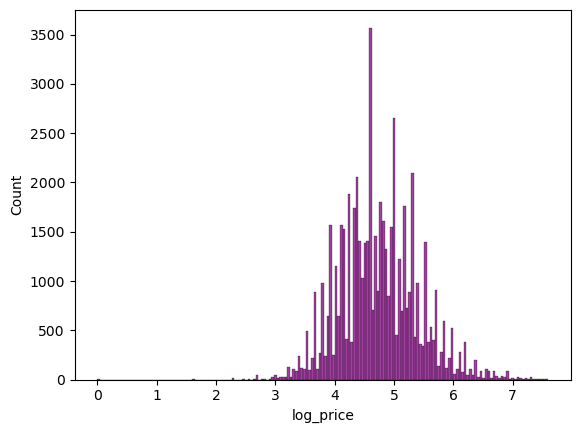

In [318]:
sb.histplot(data= data, x = "log_price", color= "purple");

- Just to show the normal distribution (unskewedness) of the "log_price" as a variable.

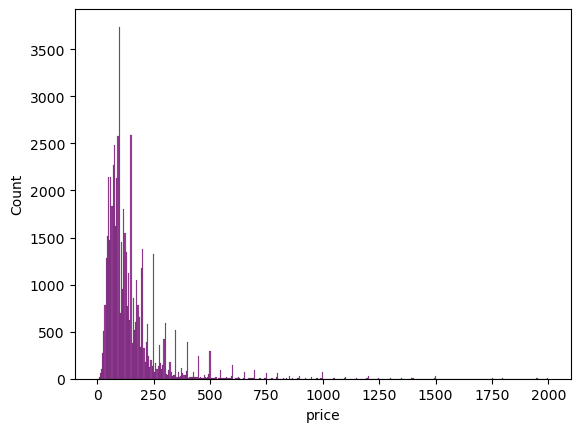

In [319]:
sb.histplot(data= data, x = "price", color= "purple");

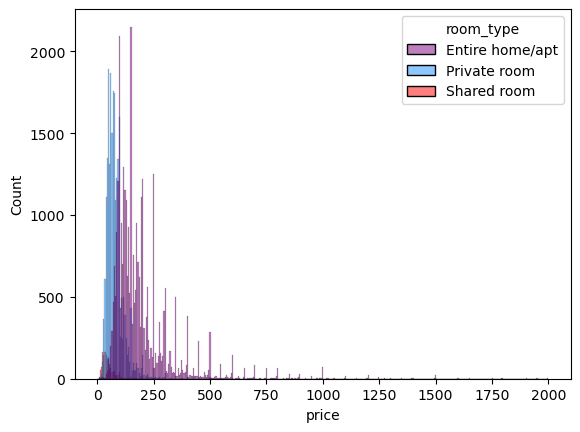

In [106]:
sb.histplot(data= data, x = "price", color= "purple", hue= "room_type", palette= ["purple","dodgerblue","red"], legend= "full");

- The highest patronage were for properties with lower prices (below $250).
- Entire home/private room had the highest patronage relating to price.

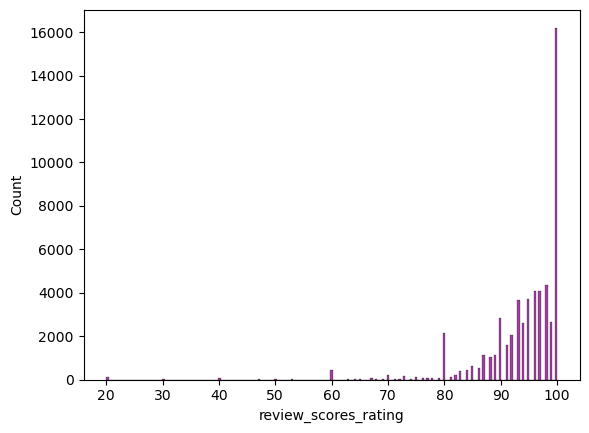

In [320]:
sb.histplot(data= data, x = "review_scores_rating", color= "purple");

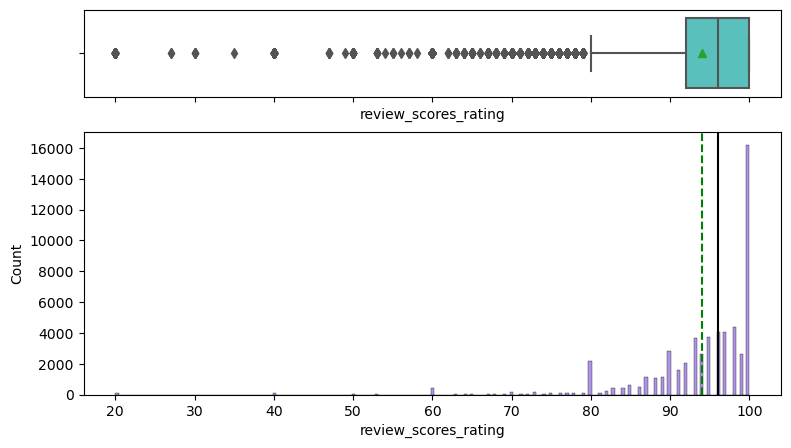

In [321]:
histogram_boxplot(data=data, feature="review_scores_rating")


- Majority of the properties received "reveiw scores rating" between 80 - 100.

### Discrete Numerical (Categorical) Variables

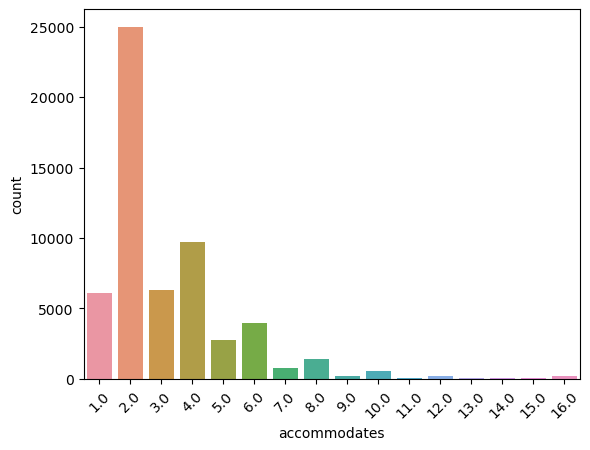

In [322]:
mpl.xticks(rotation = 45)
sb.countplot(data=data, x="accommodates");

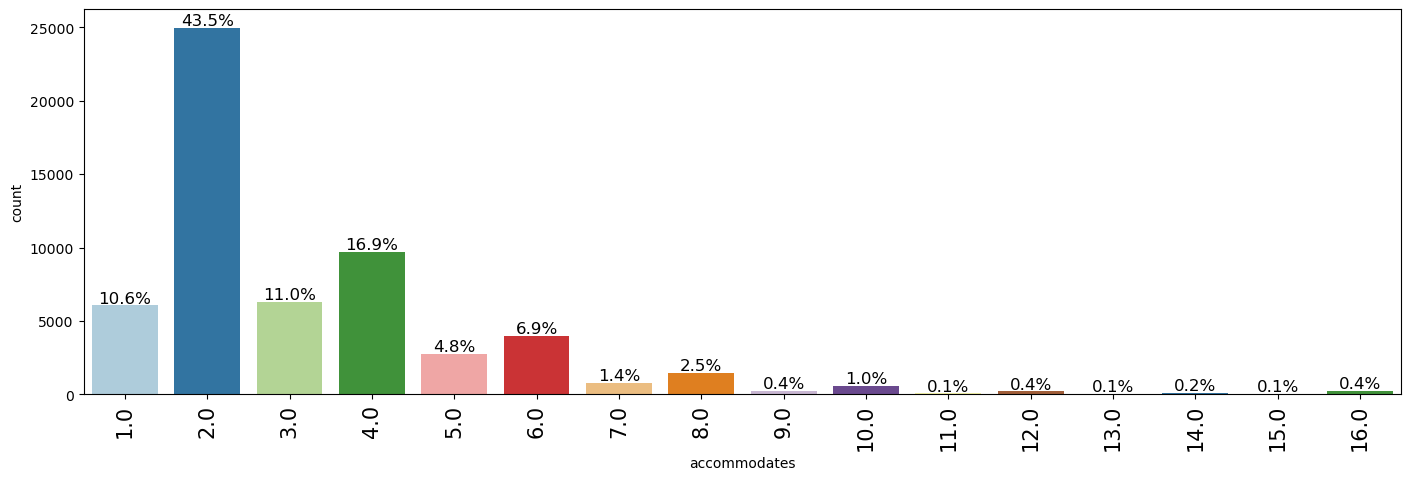

In [323]:
labeled_barplot(data= data, feature= "accommodates", perc= True)

- High patronage were for properties that can accomodate between one to four people, with the highest (43.5%) being properties that accomodates just two people.

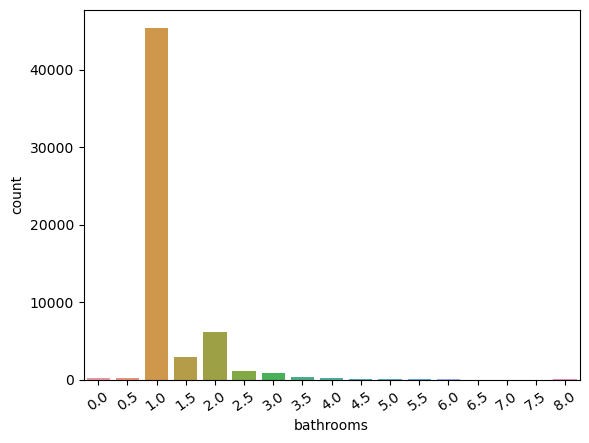

In [324]:
mpl.xticks(rotation = 35)
sb.countplot(data=data, x="bathrooms");

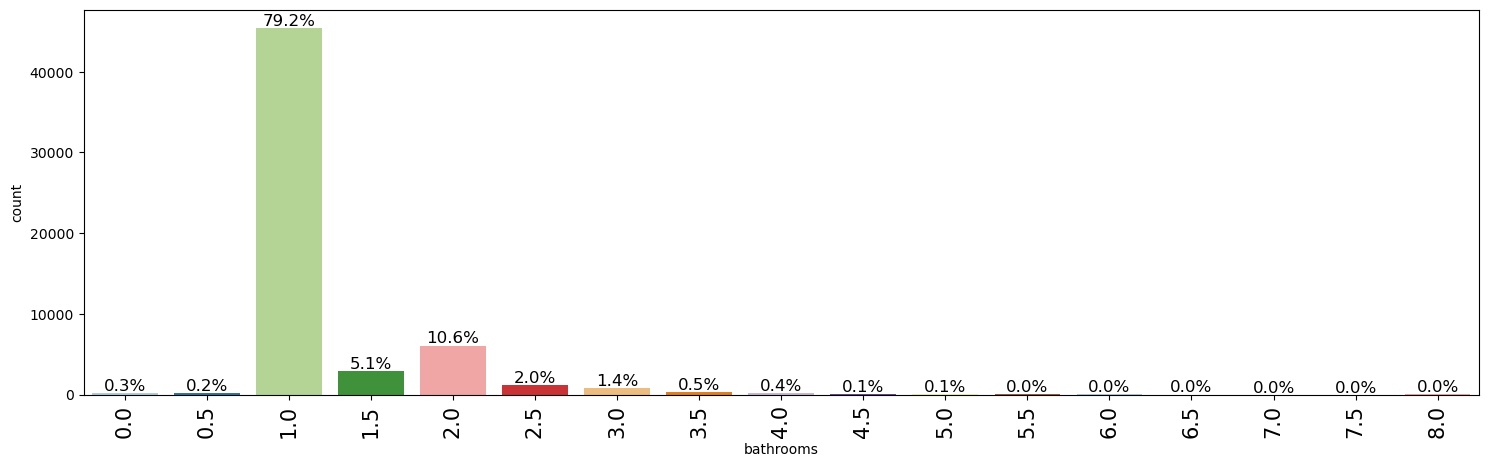

In [325]:
labeled_barplot(data=data, feature="bathrooms", perc=True)

- High counts were for properties that have one to two bathrooms. But the highest count (79.2%) was for properties with just one bathroom.

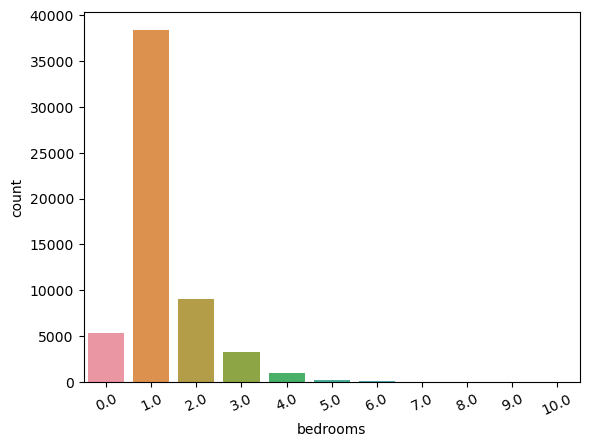

In [326]:
mpl.xticks(rotation = 25)
sb.countplot(data=data, x="bedrooms");

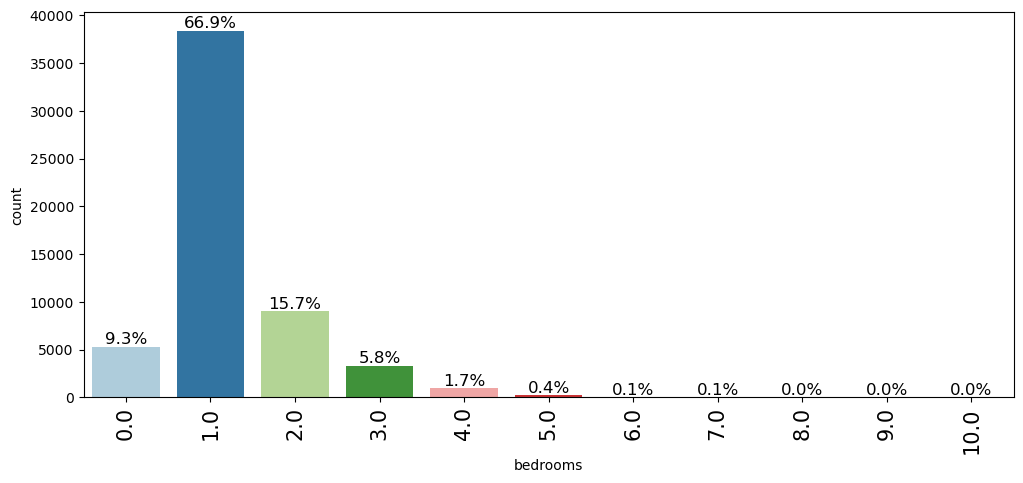

In [260]:
labeled_barplot(data=data, feature="bedrooms", perc=True)

- Properties with zero to two bedrooms have the top three patronage score. However, topping the list (a percentage count of 66.9%) are properties having just one bedroom.

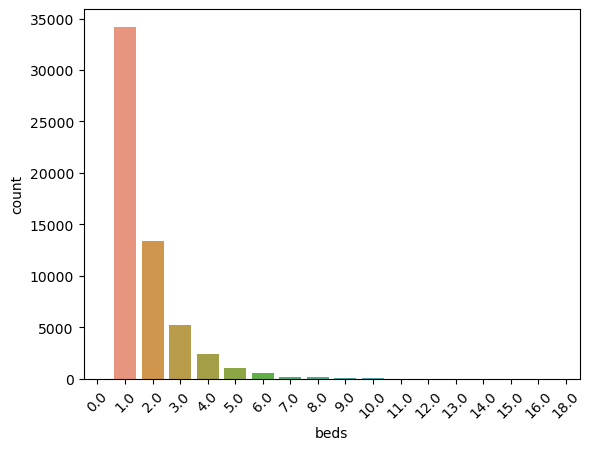

In [262]:
mpl.xticks(rotation = 45)
sb.countplot(data=data, x="beds");

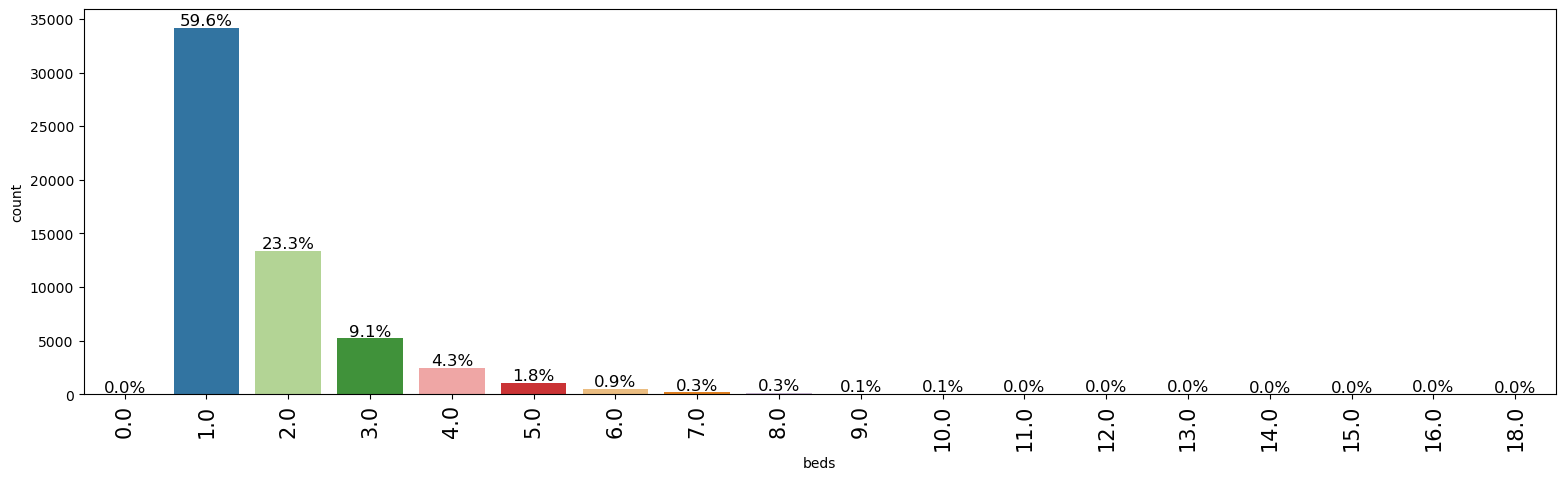

In [263]:
labeled_barplot(data=data, feature="beds", perc=True)

- As the number of beds that a property has increases, the lower the patronage.
- Properties with just one or two beds got the highest customers, with those having just one bed topping the list with a percentage count of 59.6%.

## Categorical Variable

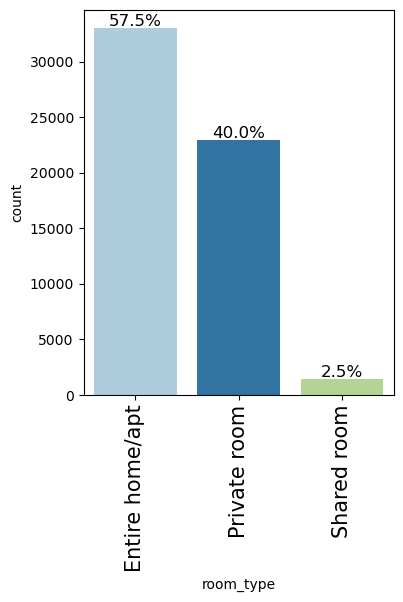

In [264]:
labeled_barplot(data= data, feature= "room_type", perc= True)

- The "Entire home/apt" have the highest count (57.5%) than the other two room type, with "shared room" having the lowest patronage with a percentage of just 2.5%.

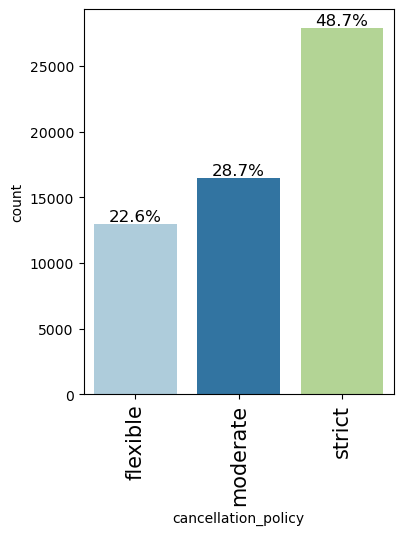

In [265]:
labeled_barplot(data= data, feature= "cancellation_policy", perc= True)

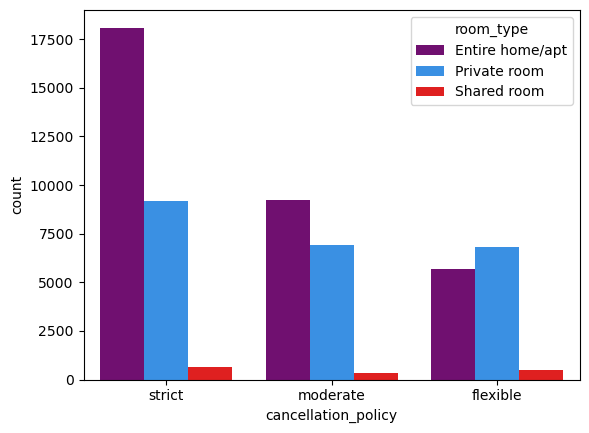

In [266]:
sb.countplot(data= data, x = "cancellation_policy", color= "purple", hue= "room_type", palette= ["purple","dodgerblue","red"]);

- Properties with strict cancellation policy had the highest patronage (48.7%) than the other types of cancellation_policies.

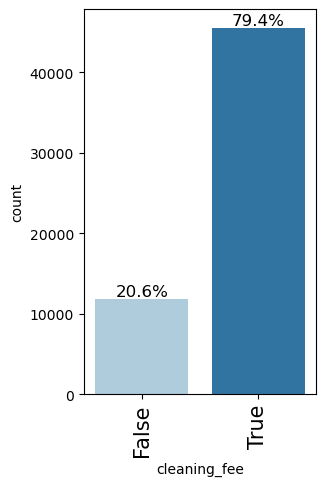

In [267]:
labeled_barplot(data= data, feature= "cleaning_fee", perc= True)

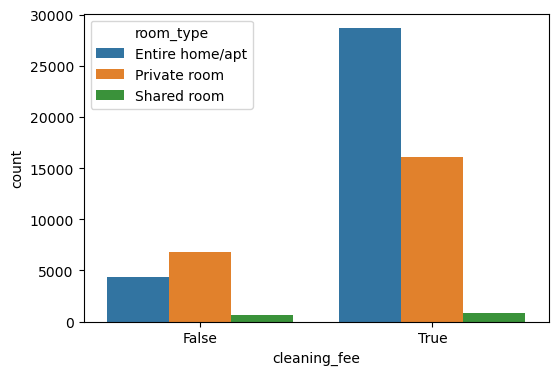

In [268]:
mpl.figure(figsize=(6,4))
sb.countplot(data= data, x= "cleaning_fee", hue= "room_type");

- Properties that have the cleaning fee included as part of the rental cost have the highest patronage (79.4%).

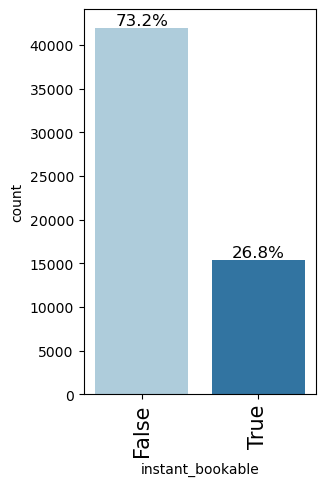

In [327]:
labeled_barplot(data=data, feature="instant_bookable", perc= True)

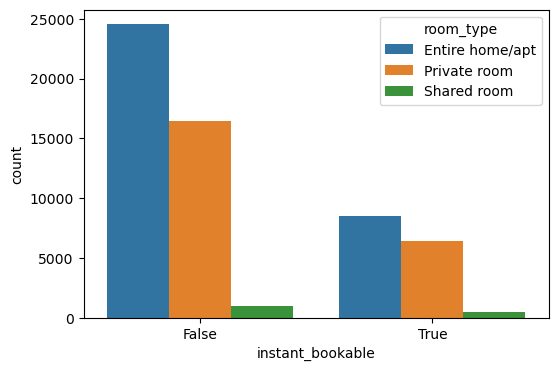

In [270]:
mpl.figure(figsize=(6,4))
sb.countplot(data= data, x= "instant_bookable", hue= "room_type");

- 73.2% of the total bookings were made on properties that do not have the availability or possibility of instant booking" (or those that do not support instant booking).

## Bivariate Analysis

In [281]:
data_corr = data.corr()

data_corr

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,price
accommodates,1.000000,0.497809,0.177154,0.056352,-0.017090,0.720376,0.823931,0.587172,0.579042
bathrooms,0.497809,1.000000,0.058677,0.003317,0.010782,0.574011,0.512700,0.347428,0.490085
cleaning_fee,0.177154,0.058677,1.000000,0.017549,0.034804,0.113119,0.125097,0.180813,0.121227
instant_bookable,0.056352,0.003317,0.017549,1.000000,-0.068874,-0.002767,0.058690,-0.050719,-0.037823
review_scores_rating,-0.017090,0.010782,0.034804,-0.068874,1.000000,0.011193,-0.027375,0.091219,0.067100
bedrooms,0.720376,0.574011,0.113119,-0.002767,0.011193,1.000000,0.704625,0.489669,0.551266
beds,0.823931,0.512700,0.125097,0.058690,-0.027375,0.704625,1.000000,0.461564,0.491085
log_price,0.587172,0.347428,0.180813,-0.050719,0.091219,0.489669,0.461564,1.000000,0.852718
price,0.579042,0.490085,0.121227,-0.037823,0.067100,0.551266,0.491085,0.852718,1.000000


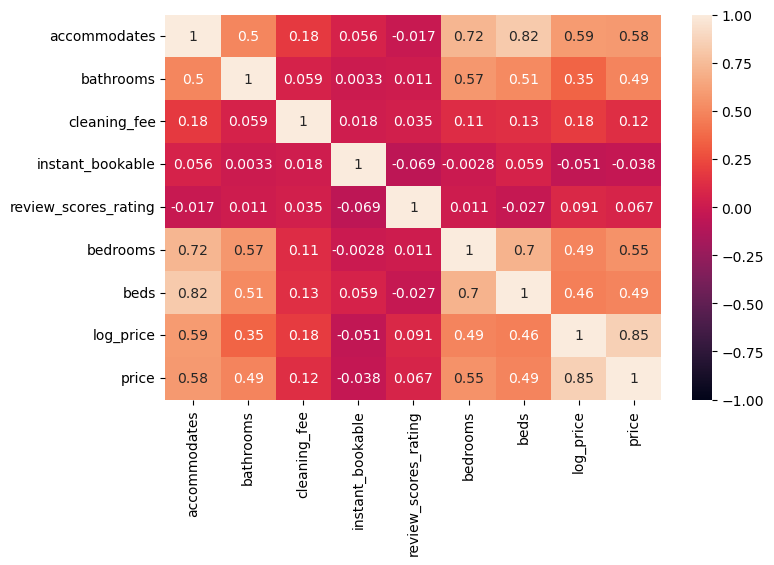

In [333]:
mpl.figure(figsize= (8,5))
sb.heatmap(data= data_corr, annot= True, vmax= 1, vmin= -1);

- Some of the variables have high positive correlation between one another. For example, "accommodate and beds", "accommodates and bedrooms", "beds and bedrooms".
- In addition, some of the variables also have negative correlations with others. For example, "instant bookable with both review scores rating and bedrooms", "review scores rating with both accommodates and beds."
- Finally, the target "price" has positive correlations with all the variables, except for "instant bookable" that has a negative correlations with the target. 

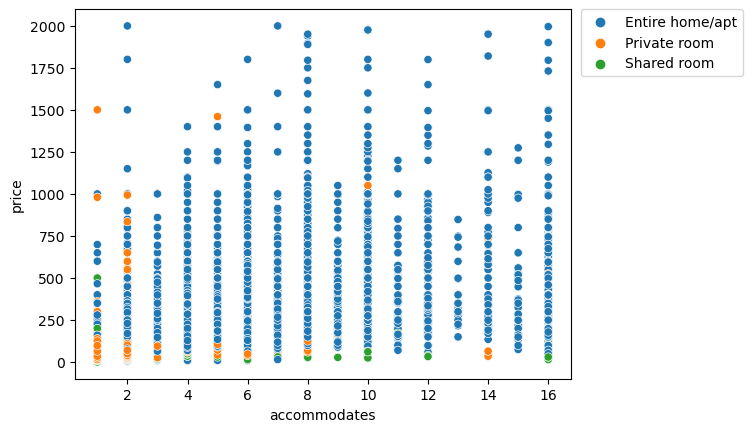

In [271]:
sb.scatterplot(data= data, y= "price", x= "accommodates", hue= "room_type", legend= "full");
mpl.legend(bbox_to_anchor = (1.02, 1.0), borderaxespad = 0);

- As seen from the plot, the properties that allow 2, 7, 8, 14 and 16 people have similar price peaks.
- So, the number of people a property accommodates does not necessarily affect the price of a property.

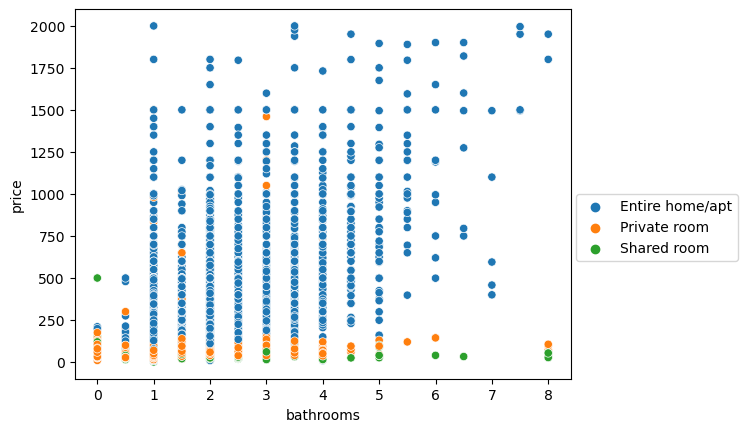

In [272]:
sb.scatterplot(data= data, y= "price", x= "bathrooms", hue= "room_type")
mpl.legend(bbox_to_anchor = (1.01, 0.5), borderaxespad = 0);

- Similar to what is explained with "accommodates", the number of bathrooms a property has does not necessarily affect the price of such property. However, the properties with zero (0) or half (0.5) bathrooms have the lowest price.

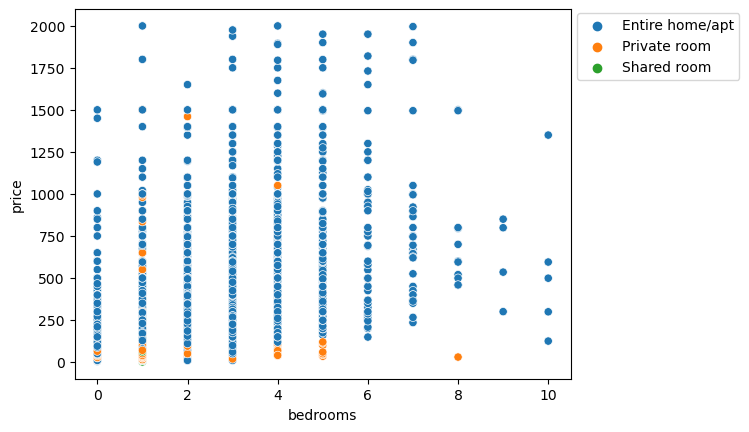

In [273]:
sb.scatterplot(data= data, y= "price", x= "bedrooms", hue= "room_type");
mpl.legend(bbox_to_anchor = (1.34, 0.99), borderaxespad = 0);

- Number of bedrooms does not have a linear or progressive effect on the price. Nevertheless, the price of a property is greatly affected (negatively) when the number of bedrooms exceeds seven (7).

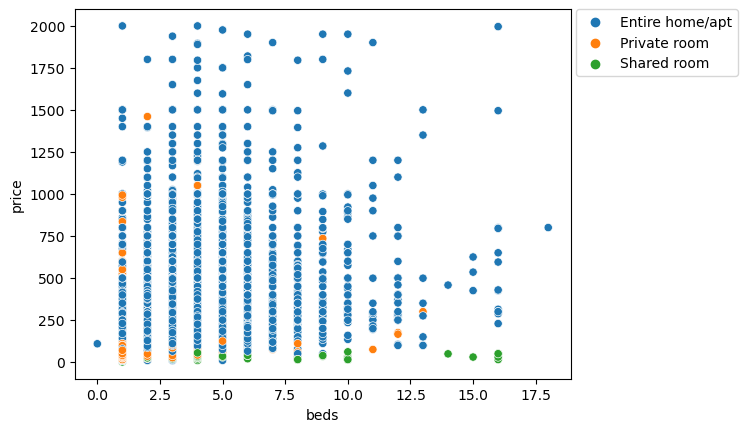

In [334]:
sb.scatterplot(data= data, y= "price", x= "beds", hue= "room_type", legend= "brief");
mpl.legend(bbox_to_anchor = (1.01, 1.0), borderaxespad = 0);

- The number of beds a property has does not affect the price of such property.

## Categorical Bivariate Plots

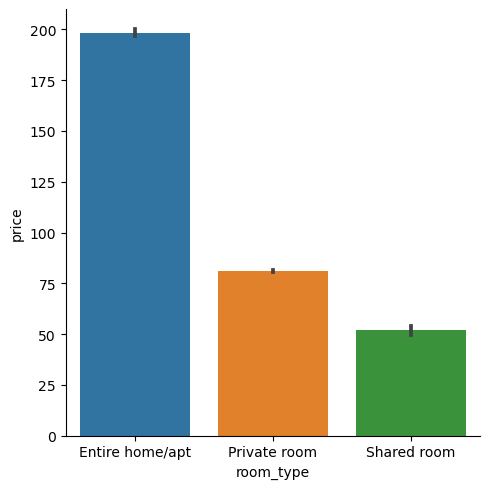

In [275]:
sb.catplot(data= data, y= "price", x= "room_type", kind= "bar");

- The "Entire home/apt" has the highest price, while a shared room has the lowest influence in price.

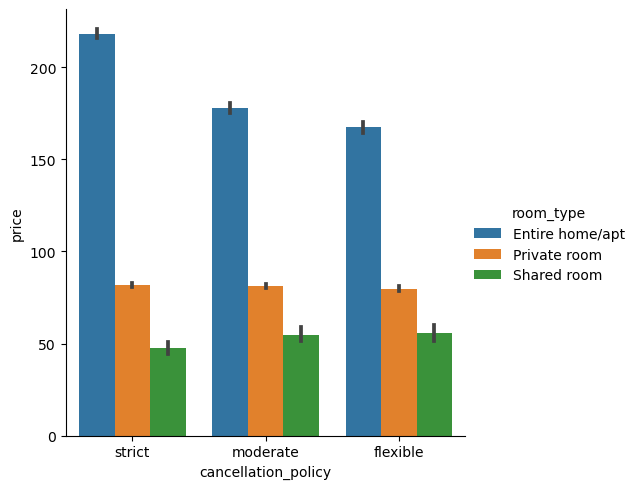

In [276]:
sb.catplot(data= data, y= "price", x= "cancellation_policy", kind= "bar", hue= "room_type");

- The "strict" cancellation policy has the greatest influence on the price, while "flexible" cancellation policy has the least impact on the price of a property.

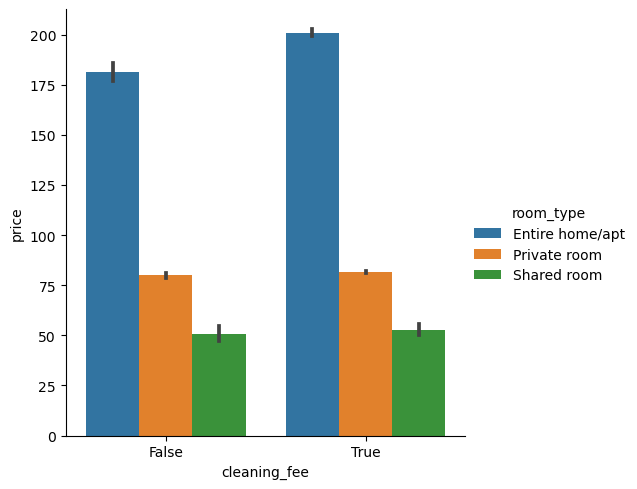

In [277]:
sb.catplot(data= data, y= "price", x= "cleaning_fee", kind= "bar", hue= "room_type");

- Properties with the "cleaning fee" added to the rent are more expensive than those without cleaning fees included in the rental cost.

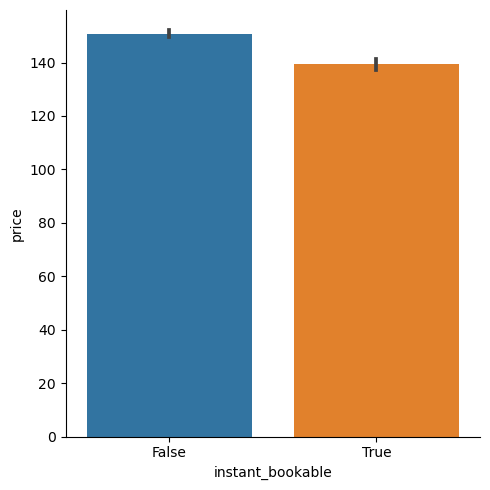

In [278]:
sb.catplot(data= data, y= "price", x= "instant_bookable", kind= "bar");

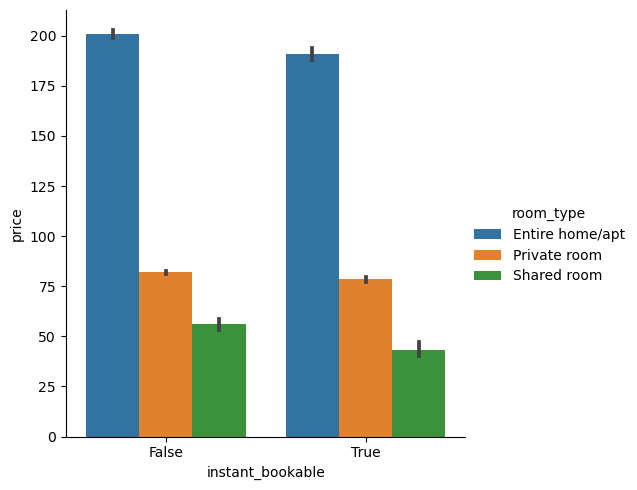

In [279]:
sb.catplot(data= data, y= "price", x= "instant_bookable", kind= "bar", hue= "room_type");

- Properties that do not allow instant booking are more expensive than properties which support instant booking.

## Observations, Suggestions And/Or Recommendations:

- Most of the patronage were for properties with lower prices (below $250). Owners of properties should consider making the fee (rental price) of their properties as cheap and affordable as possible.

- Below are the various factors that affect the price of a property;
   
    - The number of bathrooms: Properties with zero (0) or half (0.5) bathrooms have the lowest price.
   
    - Number of bedrooms: The price of a property is greatly affected (negatively) when the number of bedrooms exceeds seven (7).
   
    - Room type: The "Entire home/apt" has the highest price impact (most expensive), while a shared room has the lowest influence of price.
   
    - Cancellation policy: The "strict cancellation policy" affects the price of a property more greatly than the other options. Whereas, the "flexible cancellation policy" has the least impact on the price of a property.
   
    - Cleaning fee: Properties that have the "cleaning fee" added to the rental fee are more expensive than properties in which the cleaning fees are not included in the rental cost.
   
    - Booking time-frame: Properties that do not allow instant booking are more expensive than properties which support instant booking.

So the management or/and property owners (current and prospective) in AirBNB platform should put the above enumerated price-influncing factors into considerations and endeavour to act accordingly.